<a href="https://colab.research.google.com/github/GFour11/DS_HW9/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [111]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

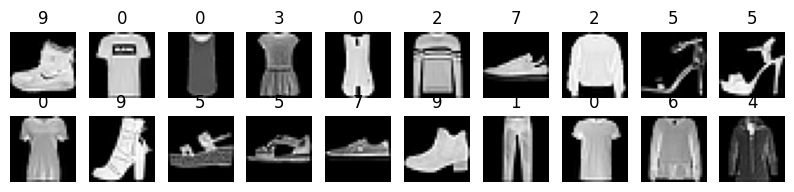

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 2))

for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(train_x[i], cmap='gray')
    plt.title(str(train_y[i]))
    plt.axis('off')

plt.show()

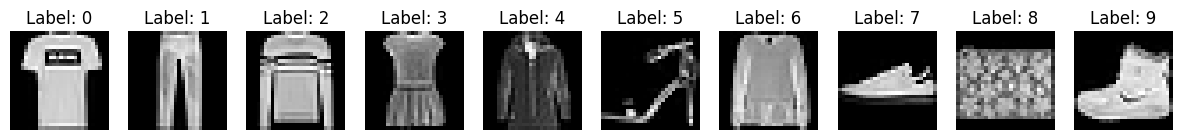

In [113]:
import numpy as np

unique_labels = np.unique(train_y)

# Вивід по одному елементу для кожного унікального лейбла
plt.figure(figsize=(15, 3))

for i, label in enumerate(unique_labels):
    # Знаходження індексу першого елемента з поточним лейблом
    index = np.where(train_y == label)[0][0]
    plt.subplot(1, len(unique_labels), i + 1)
    plt.imshow(train_x[index], cmap='gray')

    plt.title(f'Label: {label}')
    plt.axis('off')

plt.show()

T-shirt
trousers
sweater
dress
jacket
sandals
blouse
sneakers
bag
boots


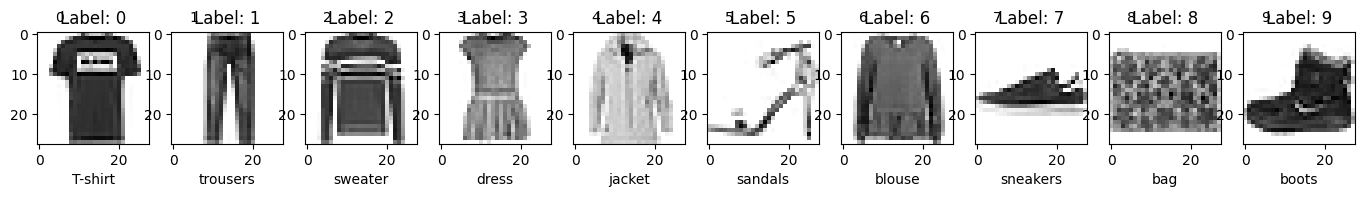

In [114]:
labels = ['T-shirt', 'trousers', 'sweater', 'dress', 'jacket', 'sandals', 'blouse', 'sneakers', 'bag', 'boots']
plt.figure(figsize=(17, 5))
unique_labels = unique_labels.astype(np.uint8)

for i, label in enumerate(unique_labels):
    index = np.where(train_y == label)[0][0]

    plt.subplot(1, len(unique_labels), i + 1)
    plt.imshow(train_x[index], cmap='binary')
    plt.xlabel(labels[label])
    print(labels[label])
    plt.title(f'Label: {label}')
    plt.text(x=4, y=-3, s=i)
plt.show()

In [115]:
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [116]:
from keras.layers import Dense, Flatten
from keras.layers import Dropout

model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [117]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [118]:
model.fit(train_x, train_y, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 4s 9ms/step - loss: 0.6664 - accuracy: 0.7590 - val_loss: 0.4263 - val_accuracy: 0.8454
Epoch 2/50
375/375 [==============================] - 4s 11ms/step - loss: 0.4644 - accuracy: 0.8313 - val_loss: 0.3978 - val_accuracy: 0.8577
Epoch 3/50
375/375 [==============================] - 4s 11ms/step - loss: 0.4259 - accuracy: 0.8428 - val_loss: 0.3761 - val_accuracy: 0.8638
Epoch 4/50
375/375 [==============================] - 3s 8ms/step - loss: 0.4021 - accuracy: 0.8520 - val_loss: 0.3598 - val_accuracy: 0.8670
Epoch 5/50
375/375 [==============================] - 3s 9ms/step - loss: 0.3862 - accuracy: 0.8575 - val_loss: 0.3465 - val_accuracy: 0.8707
Epoch 6/50
375/375 [==============================] - 4s 11ms/step - loss: 0.3759 - accuracy: 0.8615 - val_loss: 0.3553 - val_accuracy: 0.8660
Epoch 7/50
375/375 [==============================] - 4s 10ms/step - loss: 0.3633 - accuracy: 0.8659 - val_loss: 0.3409 - val_accuracy: 0.8751
Ep

In [119]:
test_loss, test_acc = model.evaluate(test_x, test_y)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3265 - accuracy: 0.8897
Test accuracy: 0.8896999955177307


1/1 [==============================] - 0s 167ms/step


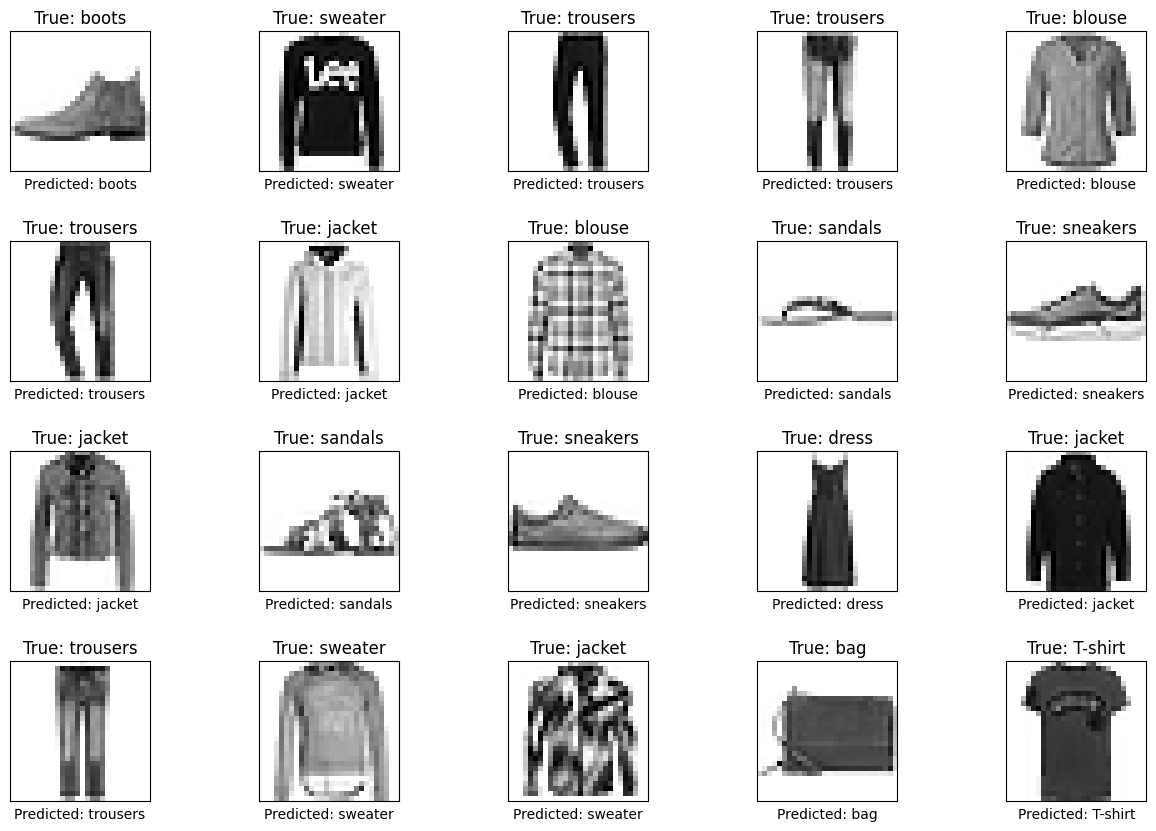

In [135]:
predictions = model.predict(test_x[:20])

plt.figure(figsize=(15, 10))

for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(test_x[i], cmap='binary')
    plt.title(f'True: {labels[np.argmax(test_y[i])]}')
    plt.xlabel(f"Predicted: {labels[np.argmax(predictions[i])]}")
    plt.xticks([])
    plt.yticks([])


plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()